In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7
# pl.rcParams['axes.titlesize'] = 5
# pl.rcParams['legend.fontsize'] = 5
# pl.rcParams['xtick.labelsize'] = 5
# pl.rcParams['ytick.labelsize'] = 5
# pl.rcParams['font.size'] = 7

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'fraction_active_postVSext2'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
# load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [6]:
renew_animals = 'c3f3', 'c3m1', 'c3m2', 'c4m3'

patterns_post = dict(zip(renew_animals, [ut.load_variable('patterns_evs_post',
                                                          '../%s/notebooks/autorestore/decoding_postVSext2/'%ani)
                                              for ani in renew_animals]))
patterns_ext2 = dict(zip(renew_animals, [ut.load_variable('patterns_evs_ext2',
                                                           '../%s/notebooks/autorestore/decoding_postVSext2/'%ani)
                                              for ani in renew_animals]))
labels_post = dict(zip(renew_animals, [ut.load_variable('labels_post',
                                                        '../%s/notebooks/autorestore/decoding_postVSext2/'%ani)
                                              for ani in renew_animals]))
labels_ext2 = dict(zip(renew_animals, [ut.load_variable('labels_ext2',
                                                         '../%s/notebooks/autorestore/decoding_postVSext2/'%ani)
                                              for ani in renew_animals]))



In [7]:
def combine_patterns(patterns, labels, n_patterns=100, classes=[0, 1], labels_mask=None):
    patterns_comb_train = []
    for i in xrange(n_patterns):
        for odor in classes:
            p = np.concatenate([patterns[ani][np.random.choice([w for w in np.where(labels[ani]==odor)[0]])]
                                for ani in patterns.keys()])
            patterns_comb_train.append(p)
    return np.r_[patterns_comb_train]

labels_comb = np.r_[[0, 1]*100]

In [8]:
def do_calc(patterns, labels, n_loops=1000):
    values_1 = []
    values_3 = []
    for i in range(n_loops):
        patterns_comb = combine_patterns(patterns, labels)
        values_1.append((patterns_comb[labels_comb==0]>0).mean(1))
        values_3.append((patterns_comb[labels_comb==1]>0).mean(1))
        print ".",
    return np.concatenate(values_1), np.concatenate(values_3)

In [9]:
def sig_test(x, y, nx, ny):
    return sstats.ttest_ind_from_stats(x.mean(), np.std(x), nx,
                                y.mean(), np.std(y), ny)

# def sig_test(x, y, nx, ny):
#     return sstats.mannwhitneyu(x, y)

In [10]:
%%time
results_post = do_calc(patterns_post, labels_post)
results_ext2 = do_calc(patterns_ext2, labels_ext2)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

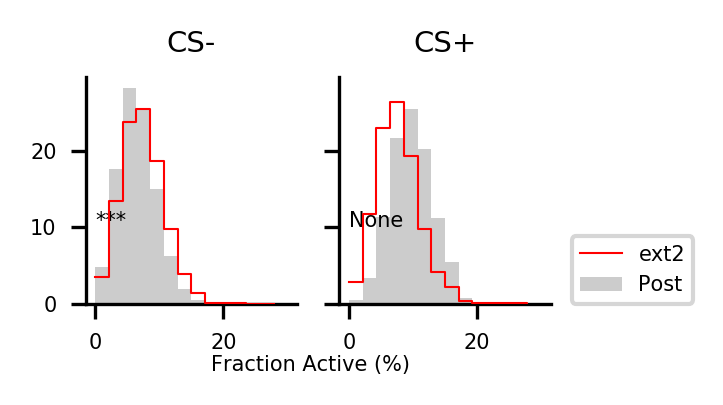

In [11]:
fig, axs = pl.subplots(1, 2, figsize=(2, 1), sharex=True, sharey=True)

for ax, r in zip(axs, results_post):
    y, x = pl.histogram(r, bins=np.linspace(0, 0.3, 15))
#     ax.step(x[:-1]*100, 100.*y/np.sum(y), lw=0.5, where='post', zorder=19)
    ax.bar(x[:-1]*100+np.diff(x)[0]*50, 100.*y/np.sum(y), lw=0, alpha=1, color='0.8', width=np.diff(x)[0]*100)
for ax, r in zip(axs, results_ext2):
    y, x = pl.histogram(r, bins=np.linspace(0, 0.3, 15))
    ax.step(x[:-1]*100, 100.*y/np.sum(y), lw=0.5, where='post', zorder=19, color='r')

ps = []
ps.append(sig_test(results_post[0], results_post[1], nx=30, ny=30)[-1])
ps.append(sig_test(results_ext2[0], results_ext2[1], nx=30, ny=30)[-1])
ps_stars = ut.convert_p_in_stars(ut.adjust_pvalues(ps))
axs[0].text(0, 10, ps_stars[0] if ps_stars[0] is not None else "n.s.")#"%.2e"%ps[0])
axs[1].text(0, 10, ps_stars[1] if ps_stars[0] is not None else "n.s.")#"%.2e"%ps[0])

fig.text(0.5, -0.1, 'Fraction Active (%)', ha='center')

axs[0].set_title('CS-')
axs[1].set_title('CS+')

axs[1].legend(['ext2', 'Post'], loc=(1.1, 0))

fig.savefig('../img/%s__hist.pdf'%NOTEBOOK_NAME)

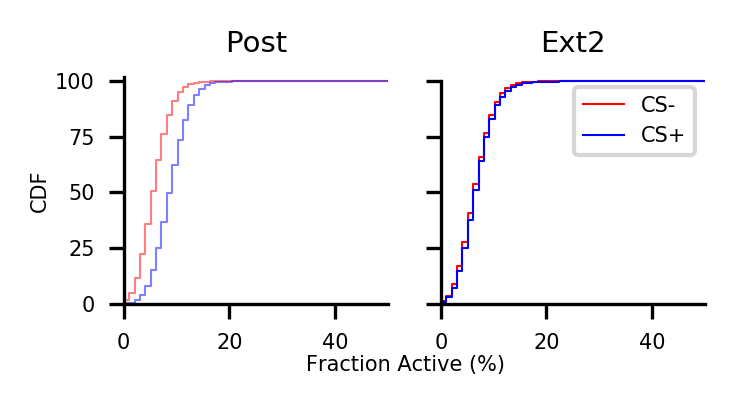

In [12]:
fig, axs = pl.subplots(1, 2, figsize=(2.5, 1), sharex=True, sharey=True)

ax = axs[0]
colors = ['r', 'b']
for r, c in zip(results_post, colors):
    y, x = np.histogram(r, bins=np.linspace(0, 0.5, 50))
    ax.step(x*100, np.cumsum(1.*np.r_[y, y[-1]])/np.sum(y)*100, where='post', color=c, alpha=0.5)
ax = axs[1]
for r, c in zip(results_ext2, colors):
    y, x = np.histogram(r, bins=np.linspace(0, 0.5, 50))
    ax.step(x*100, np.cumsum(1.*np.r_[y, y[-1]])/np.sum(y)*100, where='post', color=c)

# pvs = []
# n_corr = 12
# for area, day in product([('lec', 0), ('dg', 1)], [('d1', 0), ('d3', 1)]):
#     pvs.append(pt.add_significance(axs[day[1]][area[1]],
#                                    eval("results_%s_%s"%(area[0], day[0]))[0],
#                                    eval("results_%s_%s"%(area[0], day[0]))[1],
#                                    40, 40, 70, ticksize=0,
#                                    sig_func=lambda x, y: sstats.ttest_ind_from_stats(np.mean(x), np.std(x), 30,
#                                                                                      np.mean(y), np.std(y), 30),
#                                    thresholds=np.r_[0.05, 0.01, 0.001]/n_corr))
#     pvs.append(pt.add_significance(axs[day[1]][area[1]],
#                                    eval("results_%s_%s"%(area[0], day[0]))[0],
#                                    eval("results_%s_%s"%(area[0], day[0]))[2],
#                                    40, 40, 60, ticksize=0,
#                                    sig_func=lambda x, y: sstats.ttest_ind_from_stats(np.mean(x), np.std(x), 30,
#                                                                                      np.mean(y), np.std(y), 30),
#                                    thresholds=np.r_[0.05, 0.01, 0.001]/n_corr))
#     pvs.append(pt.add_significance(axs[day[1]][area[1]],
#                                    eval("results_%s_%s"%(area[0], day[0]))[1],
#                                    eval("results_%s_%s"%(area[0], day[0]))[2],
#                                    40, 40, 50, ticksize=0,
#                                    sig_func=lambda x, y: sstats.ttest_ind_from_stats(np.mean(x), np.std(x), 30,
#                                                                                      np.mean(y), np.std(y), 30),
#                                    thresholds=np.r_[0.05, 0.01, 0.001]/n_corr))

    
ax.set_xlim(0, 50)
ax.set_ylim(0, 102)
ax.spines['left'].set_bounds(0, 100)

axs[0].set_title('Post')
axs[1].set_title('Ext2')

axs[-1].legend(['CS-', 'CS+'])

fig.text(0.5, -0.1, 'Fraction Active (%)', ha='center')

fig.text(0, 0.5, 'CDF', rotation=90, va='center')

fig.savefig('../img/%s__cdf.pdf'%NOTEBOOK_NAME, bbox_inches='tight')